# An analysis of Exchange rates of US dollars to Euros #
###                                1999 - 2022       ###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')

In [2]:
exchange_rates.head(5)
exchange_rates.tail(5)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5987,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5988,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5989,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5990,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5991,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5992 non-null   object 
 1   [Australian dollar ]      5992 non-null   object 
 2   [Bulgarian lev ]          5590 non-null   object 
 3   [Brazilian real ]         5724 non-null   object 
 4   [Canadian dollar ]        5992 non-null   object 
 5   [Swiss franc ]            5992 non-null   object 
 6   [Chinese yuan renminbi ]  5724 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5992 non-null   object 
 9   [Danish krone ]           5992 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5992 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5992 non-null   object 
 14  [Croatia

## Data Cleaning ##

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
euro_to_dollar = exchange_rates[['US_dollar','Time']]

In [6]:
euro_to_dollar['US_dollar'].value_counts()
print(euro_to_dollar)

     US_dollar       Time
0       1.1789 1999-01-04
1       1.1790 1999-01-05
2       1.1743 1999-01-06
3       1.1632 1999-01-07
4       1.1659 1999-01-08
...        ...        ...
5987    1.1338 2022-02-21
5988    1.1342 2022-02-22
5989    1.1344 2022-02-23
5990    1.1163 2022-02-24
5991    1.1216 2022-02-25

[5992 rows x 2 columns]


In [7]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
print(euro_to_dollar.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5982, 5983, 5984, 5985, 5986, 5987, 5988, 5989, 5990, 5991],
           dtype='int64', length=5930)


In [8]:
euro_to_dollar['US_dollar'].astype(float)

0       1.1789
1       1.1790
2       1.1743
3       1.1632
4       1.1659
         ...  
5987    1.1338
5988    1.1342
5989    1.1344
5990    1.1163
5991    1.1216
Name: US_dollar, Length: 5930, dtype: float64

## Data Visualization ##

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5987    1.134313
5988    1.134333
5989    1.134247
5990    1.133247
5991    1.132477
Name: rolling_mean, Length: 5930, dtype: float64


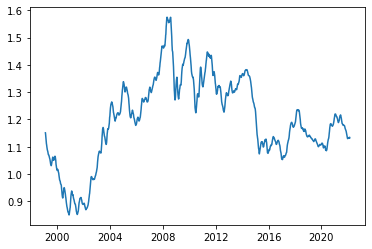

In [9]:
#calculating rolling mean
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
print(euro_to_dollar['rolling_mean'])
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])
plt.show()

### US Dollar to Euro exchange rate under presidents : George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021) ###

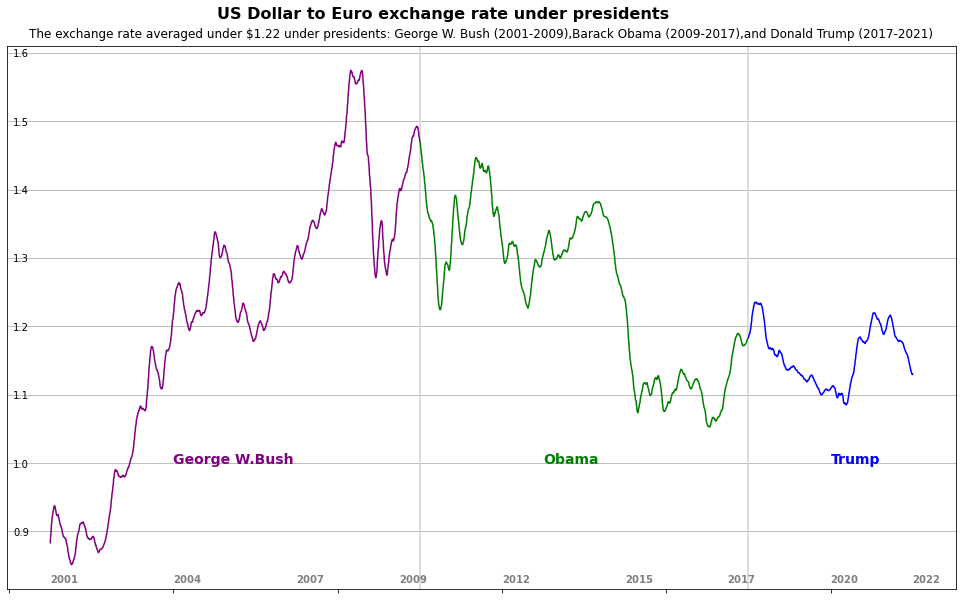

In [178]:
import datetime as dt
fig, ax = plt.subplots(figsize = (17,10))
presidents= euro_to_dollar[(euro_to_dollar['Time'].dt.year> 2000) & (euro_to_dollar['Time'].dt.year < 2022 )]
p_g = presidents[(presidents['Time'].dt.year > 2000) & (presidents['Time'].dt.year < 2010)]
p_o = presidents[(presidents['Time'].dt.year > 2009) & (presidents['Time'].dt.year < 2018)]
p_t = presidents[(presidents['Time'].dt.year > 2017) & (presidents['Time'].dt.year < 2022)]
ax.axvline(x= dt.datetime(2009,12,31), color='#D3D3D3')
ax.axvline(x= dt.datetime(2017,12,31), color='#D3D3D3')
ax.tick_params(left= 0, axis = 'y', direction = 'in', pad= -22)
ax.set_xticklabels([])
ax.plot(p_g['Time'], p_g['rolling_mean'],color='purple')
ax.plot(p_o['Time'], p_o['rolling_mean'],color='green')
ax.plot(p_t['Time'], p_t['rolling_mean'],color='blue')
ax.text(x=dt.datetime(2001,1,1), y= 0.825, s='2001', color='black', weight = 'bold', alpha = 0.5)
ax.text(x=dt.datetime(2004,1,1), y= 0.825, s='2004', color='black', weight = 'bold', alpha = 0.5)
ax.text(x=dt.datetime(2007,1,1), y= 0.825, s='2007', color='black', weight = 'bold', alpha = 0.5)
ax.text(x=dt.datetime(2009,6,30), y= 0.825, s='2009', color='black', weight = 'bold', alpha = 0.5)
ax.text(x=dt.datetime(2012,1,1), y= 0.825, s='2012', color='black', weight = 'bold', alpha = 0.5)
ax.text(x=dt.datetime(2017,6,30), y= 0.825, s='2017', color='black', weight = 'bold', alpha = 0.5)
ax.text(x=dt.datetime(2015,1,1), y= 0.825, s='2015', color='black', weight = 'bold', alpha = 0.5)
ax.text(x=dt.datetime(2020,1,1), y= 0.825, s='2020', color='black', weight = 'bold', alpha = 0.5)
ax.text(x=dt.datetime(2021,12,31), y= 0.825, s='2022', color='black', weight = 'bold', alpha = 0.5)
ax.text(x=dt.datetime(2004,1,1), y= 1, s='George W.Bush',size = 14, weight = 'bold',color='purple')
ax.text(x=dt.datetime(2013,1,1), y= 1, s='Obama',size = 14, weight = 'bold', color = 'green')
ax.text(x=dt.datetime(2020,1,1), y= 1, s='Trump', size= 14, weight= 'bold', color = 'blue')
ax.text(x=dt.datetime(2005,1,20), y= 1.65, s='US Dollar to Euro exchange rate under presidents', weight = 'bold', size = 16, backgroundcolor='white')
ax.text(x=dt.datetime(2000,6,25), y= 1.623, s='The exchange rate averaged under $1.22 under presidents: George W. Bush (2001-2009),Barack Obama (2009-2017),and Donald Trump (2017-2021) ', size = 12, backgroundcolor='white')
stitle= 'The exchange rate averaged under $1.22 under presidents: George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)'
plt.grid(axis= 'y')

plt.show()


## Conclusion ##
Our analysis of USD to Euro exchanges through 3 presidencies show that the dollar rate averaged at 